<a href="https://colab.research.google.com/github/Anupama-du/HackAIThon/blob/main/Zomato_Sentiment_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.preprocessing import MinMaxScaler

import plotly.io as pio
pio.templates.default = "plotly_dark"
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
pip install tensorflow==2.13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [4]:
from google.colab import files


uploaded = files.upload()


Saving Zomatodata.csv to Zomatodata.csv


In [5]:
# Load Dataset
df_one=pd.read_csv("Zomatodata.csv")

In [ ]:
# Dataset First Look
df_one.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# Dataset Rows & Columns count
df_one.shape

(105, 6)

In [7]:
# Dataset Info
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [8]:
# Dataset Duplicate Value
df_one.duplicated().value_counts()

False    105
dtype: int64

In [9]:
# Missing Values/Null Values Count
df_one.isnull().any()

Name           False
Links          False
Cost           False
Collections     True
Cuisines       False
Timings         True
dtype: bool

<Axes: >

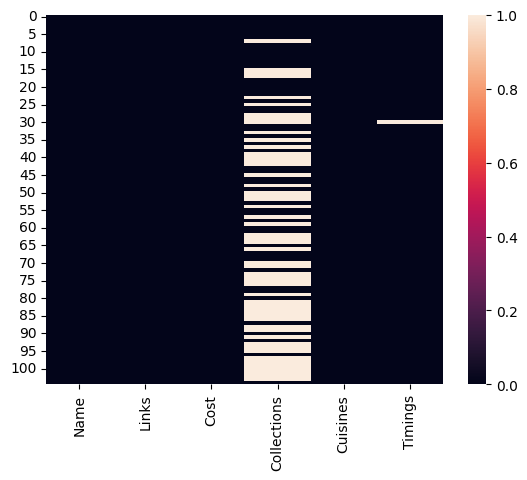

In [10]:
# Visualizing the missing values
sns.heatmap(df_one.isnull())

In [11]:
#replace null values
df_one['Collections'].fillna(method='ffill',inplace=True)

In [12]:
df_one.isna().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        1
dtype: int64

In [13]:
df_one.dropna(inplace=True)

In [14]:
df_one.isna().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

In [15]:
# Dataset Columns
df_one.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [16]:
# Dataset
df_one.describe(include="all")

,Name,Links,Cost,Collections,Cuisines,Timings
count,104,104,104,104,104,104
unique,104,104,29,42,91,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,14,4,6


In [17]:
pd.set_option('display.max_colwidth', None)
df_one.loc[0:6,['Name','Links']]

,Name,Links
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fishermans-wharf-gachibowli
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachibowli


In [18]:
pd.set_option('display.max_colwidth', None)
df_one.loc[50:54,['Name','Links']]

,Name,Links
50,Gal Punjab Di,https://www.zomato.com/hyderabad/gal-punjab-di-gachibowli
51,Hitech Bawarchi Food Zone,https://www.zomato.com/hyderabad/hitech-bawarchi-food-zone-gachibowli
52,Biryanis And More,https://www.zomato.com/hyderabad/biryanis-and-more-gachibowli
53,Diners Pavilion,https://www.zomato.com/hyderabad/diners-pavilion-gachibowli
54,Asian Meal Box,https://www.zomato.com/hyderabad/asian-meal-box-gachibowli


In [19]:
#find out the reson why Cost column has datatype object
df_one['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '700', '900', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [20]:
df_one = df_one.drop(['Links'], axis=1)

In [21]:
df_one['Cost']=df_one['Cost'].str.replace(",","").astype('int64')

In [22]:
df_one['Cost'].dtype

dtype('int64')

In [23]:
print(df_one.head())

                             Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                                                                                                        Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings   
1                                                                                                               Hyderabad's Hottest   
2                                                                                                Great Buffets, Hyderabad's Hottest   
3                                                                                                            Late Night Restaurants   
4                       Best Bars & Pubs, Food Hygiene Rated Resta

In [24]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


In [25]:
df_one['Cost'].iplot(kind='hist',bins=10, title='Distribution - Cost',theme="space")

In [26]:
df_one.columns

Index(['Name', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [27]:
cf.tools.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [28]:
df_one.iplot(x="Name",y='Cost', title="Per person dining cost of each Restaurant ", theme='solar',colorscale='plotly')

In [29]:
Top10Costly = df_one[['Name','Cost']].groupby('Name').sum().sort_values(by='Cost',ascending=False).head(10)

In [30]:
Top10Costly

,Cost
Name,
Collage - Hyatt Hyderabad Gachibowli,2800
Feast - Sheraton Hyderabad Hotel,2500
10 Downing Street,1900
Jonathan's Kitchen - Holiday Inn Express & Suites,1900
Cascade - Radisson Hyderabad Hitec City,1800
Zega - Sheraton Hyderabad Hotel,1750
Republic Of Noodles - Lemon Tree Hotel,1700
Mazzo - Marriott Executive Apartments,1700
Barbeque Nation,1600


In [31]:
Top10Costly.iplot(kind='bar',colorscale='plotly',theme='solar',title='Top 10 Expensive Restaurants')

In [32]:
Top10BF = df_one[['Name','Cost']].groupby('Name').sum().sort_values(by='Cost',ascending=True).head(10)

In [33]:
Top10BF.iplot(kind='bar',colorscale='plotly',theme='solar',title='Top 10 Budget Friendly Restaurants')

In [34]:
import plotly.express as px
fig1 = px.scatter(df_one,x=df_one['Cuisines'], y=df_one['Cost'],color=df_one['Name'],orientation='h',height=800,title='Cost per persons vs. Cuisines served')
fig1.show()

In [36]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the Pandas DataFrame
# df = pd.read_csv('my_data.csv')

# Define the text preprocessing pipeline
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    nltk.download('punkt')

# = "This is an example text with 1.23 and 4.56 float values that need to be removed."

# Define a regex pattern to match float values
    pattern = r'\d+\.\d+'

# Remove float values from the text
    text_without_floats = re.sub(pattern, '', text)

# Tokenize the text to check the result
    tokens = nltk.word_tokenize(text_without_floats)
#print(tokens)
#In this example, we define a regex pattern \d+\.\d+ that matches float values in the text. We use the re.sub() function to replace all occurrences of the pattern with an empty string, effectively removing the float values from the text. Finally, we tokenize the text using the nltk.word_tokenize() function to check the result. The output should be ['This', 'is', 'an', 'example', 'text', 'with', 'and', 'float', 'values', 'that', 'need', 'to', 'be', 'removed', '.'], which does not contain any float values.



    tokens = ' '.join([str(elem) for elem in tokens])

    # Convert the text to lowercase
    tokens = tokens.lower()
    # Remove punctuation
    tokens = ''.join(c for c in text if not c.isalnum() and not c.isspace())
    # Remove stopwords
    tokens = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatize the words
    tokens = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
df_one.Collections.isna().sum()

0

In [38]:
df_one.dropna(inplace=True)

In [40]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [41]:
# Apply the preprocessing pipeline on the 'text' column of the DataFrame
df_one['Collections'] = df_one['Collections'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[

In [42]:
df_one['Cuisines'] = df_one['Cuisines'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[

In [43]:
df_one.head()

,Name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest","Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)"


In [44]:
pip install wordcloud

(-0.5, 1799.5, 1399.5, -0.5)

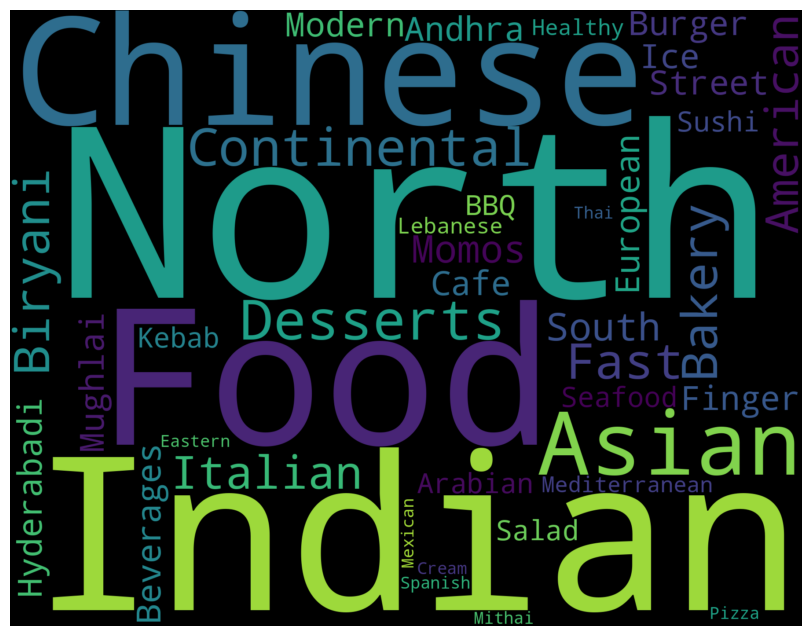

In [45]:
from wordcloud import WordCloud
from collections import Counter
text = ' '.join(df_one['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}


word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1800, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1999.5, 1499.5, -0.5)

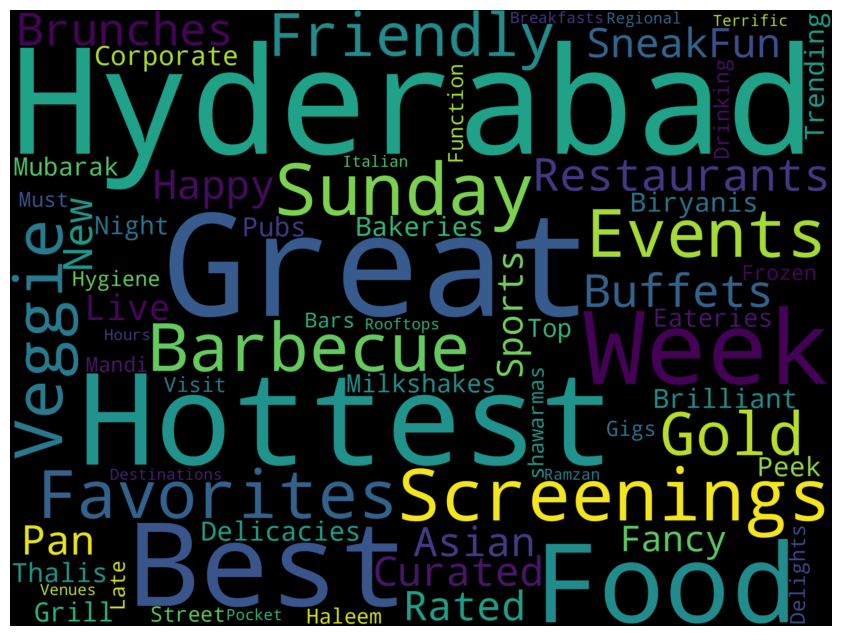

In [46]:
from collections import Counter
text = ' '.join(df_one['Collections'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}


word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 1500,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [47]:
# Convert the 'Values' column into a list
df_one['Cuisines'] = df_one['Cuisines'].str.split(',')

# Use the explode() function on the 'Values' column
df_exploded = df_one.explode('Cuisines')

# Print the result


In [48]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         310 non-null    object
 1   Cost         310 non-null    int64 
 2   Collections  310 non-null    object
 3   Cuisines     310 non-null    object
 4   Timings      310 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.5+ KB


In [49]:
#df_exploded.groupby('Cuisines').sum()
s = df_exploded.groupby(["Cuisines", "Name"], group_keys=True)

In [50]:
s.max()

Cost  \
Cuisines     Name                                           
 American    Absolute Sizzlers                        750   
             GD's                                     500   
 Andhra      Banana Leaf Multicuisine Restaurant      700   
             Owm Nom Nom                              900   
             T Grill                                  700   
...                                                   ...   
South Indian Mathura Vilas                            500   
             Udipi's Upahar                           500   
Street Food  Mohammedia Shawarma                      150   
             Sardarji's Chaats & More                 400   
Thai         Republic Of Noodles - Lemon Tree Hotel  1700   

                                                                                       Collections  \
Cuisines     Name                                                                                    
 American    Absolute Sizzlers                                                       Great Buffets   
             GD's                                                               Brilliant Biryanis   
 Andhra      Banana Leaf Multicuisine Restaurant                                     Great Buffets   
             Owm Nom Nom                                         Great Buffets, Trending This Week   
             T Grill                                                            Brilliant Biryanis   
...                                                                                            ...   
South Indian Mathura Vilas                                        Veggie Friendly, Terrific Thalis   
             Udipi's Upahar                                                   Pan-Asian Delicacies   
Street Food  Mohammedia Shawarma                       Food Hygiene Rated Restaurants in Hyderabad   
             Sardarji's Chaats & More                Street Food, Veggie Friendly, Pocket Friendly   
Thai         Republic Of Noodles - Lemon Tree Hotel                           Pan-Asian Delicacies   

                                                                                      Timings  
Cuisines     Name                                                                              
 American    Absolute Sizzlers                                               11:30 AM to 1 AM  
             GD's                                                            11:30 AM to 5 AM  
 Andhra      Banana Leaf Multicuisine Restaurant        12:30 PM to 3:30 PM, 7 PM to 10:40 PM  
             Owm Nom Nom                                          12Noon to 11:30PM (Mon-Sun)  
             T Grill                                       12:30 PM to 3:30 PM, 7 PM to 11 PM  
...                                                                                       ...  
South Indian Mathura Vilas                           11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM  
             Udipi's Upahar                                                  6 AM to 10:30 PM  
Street Food  Mohammedia Shawarma                                                 1 PM to 1 AM  
             Sardarji's Chaats & More                    12 Noon to 3:30 PM, 7 PM to 10:30 PM  
Thai         Republic Of Noodles - Lemon Tree Hotel     11:30 AM to 3 PM, 7 PM to 12 Midnight  

[310 rows x 3 columns]

In [52]:
from google.colab import files


uploaded = files.upload()


Saving Zomatoreviews.csv to Zomatoreviews.csv


In [53]:
#read the data
df_reviews = pd.read_csv("Zomatoreviews.csv")

In [ ]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [54]:
df_reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,"Madhumathi Mahajan Well to start with nice courteous servers and staff. Excellent serving time, all items arrived on time infact for a change had folks asking if we want to hold a little while before getting next dish out? These things matter a lot when u r paying to eat out.\n\nNow food - Jade chicken soup, nice spinach based creamy stuff, gud way to start the meal. Accompanied by house salad of cabbage and cucumber kimchi, nice dressing but cabbage cut could have been good. Fish cakes were good, loved it and accompanying sauces were awesome. Main course was Mix XO rice of chicken and prawn, well that was the downer. Nothing exciting abt it, maybe shld have coupled with a curry but then Nash, fried rice u shld be able to enjoy dry. Desert - blue berry cheesecake, so here is where me and wifey differ, I thght it was worth it, she says the base wasn't crunchy engh. So try and rate yourself.\n\nLast ambience - was warm n eye soothing.\n\nOh and I forgot, the orange pekoe tea, the best I had in lat few months. Have it",3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,"This place has never disappointed us.. The food, the courteous staff, the serene ambience.. We wanted to have something totally rice free and with very little oil. They served us Steamed Fish with chilly garlic noodles with Chicken. As always it was awesome.. Thanks Chinese Pavilion, it is always a pleasant experience!",4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone found in Veg food"" and is not acceptable for a Vegetarian.\n\nTo satiate Cravings for chinese food we headed to Chinese Pavilion and there was also a voucher available in Little app for Luncheon tray for Rs 310 (Veg) [well do not bother for the voucher as the price for Veg Luncheon tray is Rs 275/- + taxes in the restaurant itself).\n\nThe ambiance is decent and since it was noon, not many tables occupied so it was pretty quite.\n\nIt was Thrusday special (Veg):\nHot and Sour soup: was just OK - well it had sprouts which were crunchy in your mouth: something different.\nKimchi - salad (personally i'm never fond of it)\nPotato in plum sauce - this was very good and well made\nBrocolli, Baby corn, Mushroom in spicy sauce - this dish lived to its name 'too spicy'; but was fine with fried rice\nVeg hakka noodles - was good\nVeg fried rice\n\nOverall the food tasted good until a piece of chicken BONE came into my friend's (he is pure vegetarian) mouth while eating noodles. It was such a disappointment and complete experience was ruined.\nWell Management did apologise but surely they cannot put things correct and were offering of not using coupon but we surely don't want to visit the place again. I requested to see their kitchen if they really segregate pans for Veg/Non-veg cooking which Manager declined which makes me believe they don't.\n\nStaff and service are fine but they really need to improve the segregation of Veg and Non-veg as in Indian Culture it means a lot.\n\nUploaded photos with the bone found.",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,"I personally love and prefer Chinese Food. Had been here couple of times with my husband.\n\nThe ambiance of the place is very good. The entrance has some carvings and the walls were very nicely decorated. The server was very polite\n\nWhen it comes to food this place does not disappoint.This is a small/comfy restaurant that is surprisingly not very crowded even on weekends. \n\nWe went there for our anniversary celebrations and it was just perfect. No crowd, we got the attention and service we were looking for.",4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,"Checked in here to try some delicious chinese food here, seen non-veg luncheon tray menu ans tried the same 

In [55]:
df_reviews.shape

(10000, 7)

In [56]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [57]:
df_reviews.duplicated().sum()

36

In [58]:
df_reviews=df_reviews.drop_duplicates()

In [59]:
df_reviews.duplicated().sum()

0

In [60]:
# check the null values in each column in dataset
print(pd.DataFrame(df_reviews.isnull()).sum())

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64


In [61]:
df_reviews.describe(include="all")

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,9964,9962,9955,9962,9962,9962,9964.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.751305
std,NaN,NaN,NaN,NaN,NaN,NaN,2.574626
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [62]:
# Check Unique Values for each variable.
a=list(df_reviews.columns)
for i in a:
    print(f"The unique values in {i} are -  {df_reviews[i].nunique()}")

The unique values in Restaurant are -  100
The unique values in Reviewer are -  7446
The unique values in Review are -  9364
The unique values in Rating are -  10
The unique values in Metadata are -  2477
The unique values in Time are -  9782
The unique values in Pictures are -  36


In [63]:
# Write your code to make your dataset analysis ready.
df_reviews.loc[df_reviews['Rating'] == 'Like'] = np.nan
df_reviews['Rating']= df_reviews['Rating'].astype('float64')

In [64]:
print(df_reviews['Rating'].mean())

3.601044071880333


In [65]:
#Featuring data wrangling

In [66]:
print(df_reviews['Rating'].mean())

3.601044071880333


In [67]:
# split metadata column into 2 columns i.e. Reviews and followers
df_reviews['Reviews'],df_reviews['Followers']= df_reviews['Metadata'].str.split(',').str
df_reviews['Reviews'] = pd.to_numeric(df_reviews['Reviews'].str.split(' ').str[0])

In [68]:
df_reviews['Followers']= pd.to_numeric(df_reviews['Followers'].str.split(' ').str[1])

In [69]:
# Converting Time column into Time, Year, Month, Hour
df_reviews['Time']=pd.to_datetime(df_reviews['Time'])
df_reviews['Year'] = pd.DatetimeIndex(df_reviews['Time']).year
df_reviews['Month'] = pd.DatetimeIndex(df_reviews['Time']).month
df_reviews['Hour'] = pd.DatetimeIndex(df_reviews['Time']).hour
df_reviews = df_reviews.drop(['Metadata'], axis =1)

In [70]:
df_reviews.isnull().sum()

Restaurant       1
Reviewer         3
Review          10
Rating           3
Time             3
Pictures         1
Reviews          3
Followers     1581
Year             3
Month            3
Hour             3
dtype: int64

In [71]:
# Replacing followers and reviews null values into 0
df_reviews['Followers'].fillna(0,inplace=True)
df_reviews['Reviews'].fillna(0,inplace=True)

In [72]:
df_reviews.dropna(inplace=True)
df_reviews.reset_index(inplace = True)
df_reviews.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

In [73]:
df_reviews.describe(include="all")

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
count,9954.000000,9954,9954,9954,9954.000000,9954,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000
unique,NaN,100,7442,9363,NaN,9774,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Beyond Flavours,Ankita,good,NaN,2019-05-05 22:39:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,100,13,237,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2016-05-31 16:41:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-05-25 20:23:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,4983.199920,NaN,NaN,NaN,3.600261,NaN,0.751959,24.007937,163.122363,2018.452381,6.017079,15.183946
std,2882.485546,NaN,NaN,NaN,1.483573,NaN,2.575819,50.631674,620.182806,0.562566,3.160515,6.580345
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,2016.000000,1.000000,0.000000
25%,2489.250000,NaN,NaN,NaN,3.000000,NaN,0.000000,1.000000,1.000000,2018.000000,4.000000,12.000000


In [74]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 27.5 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


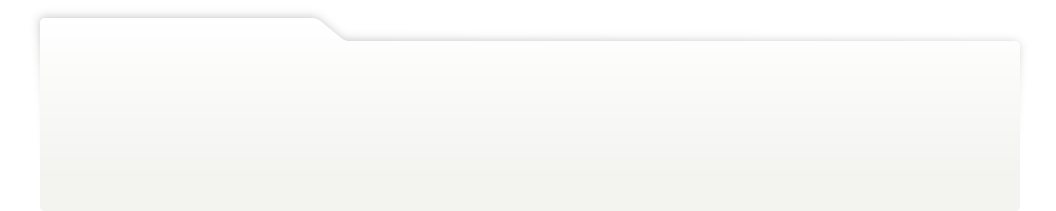
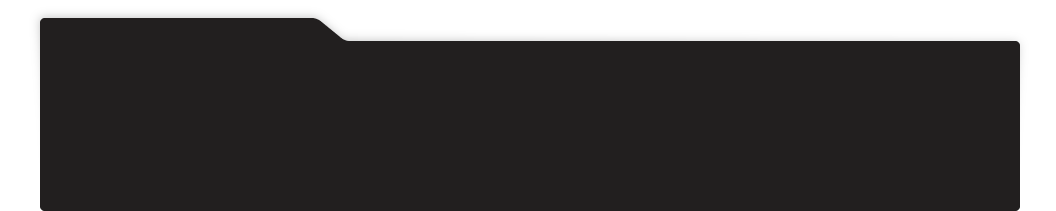
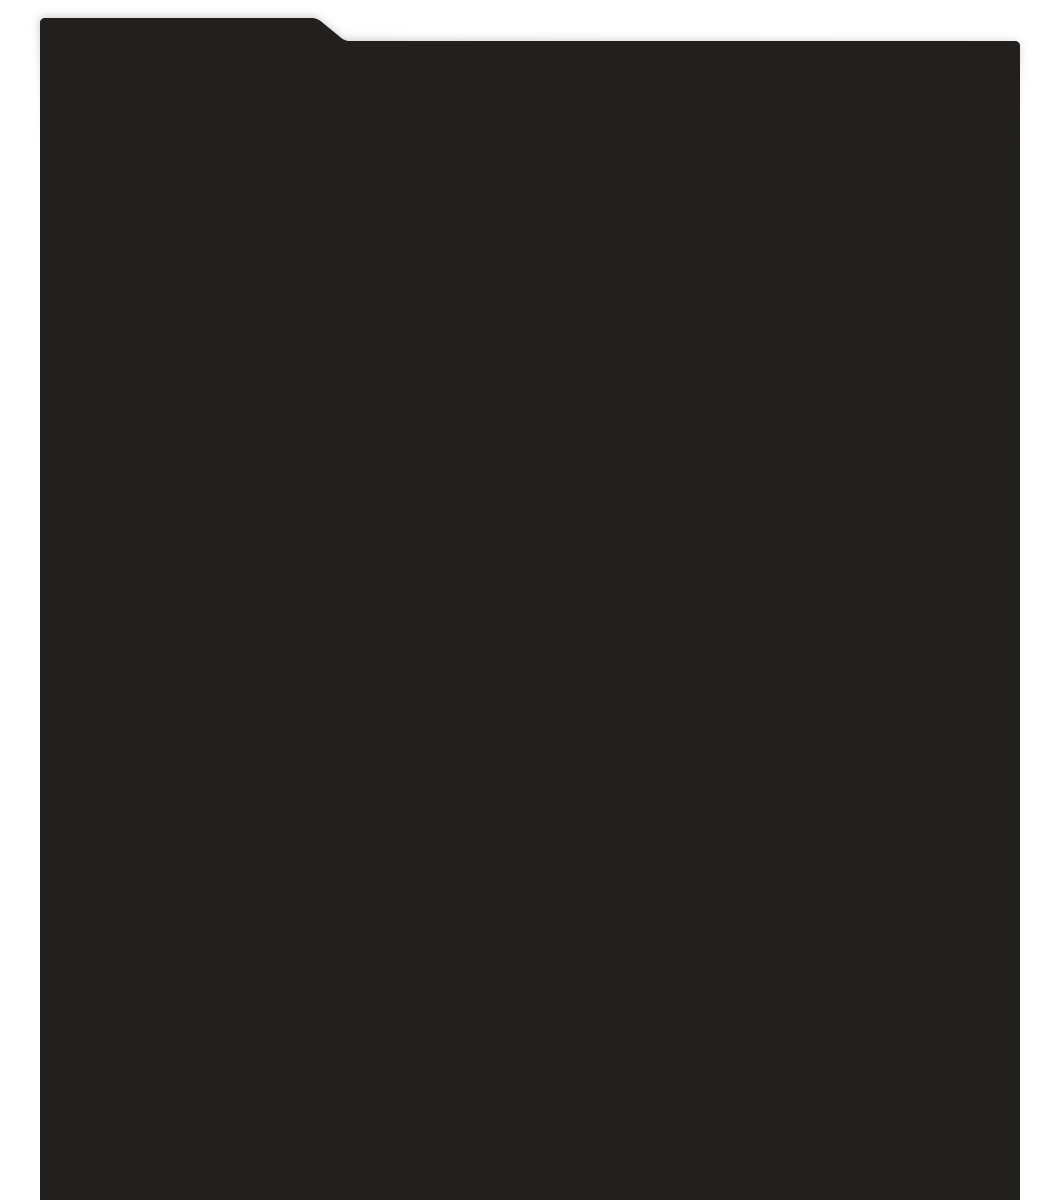
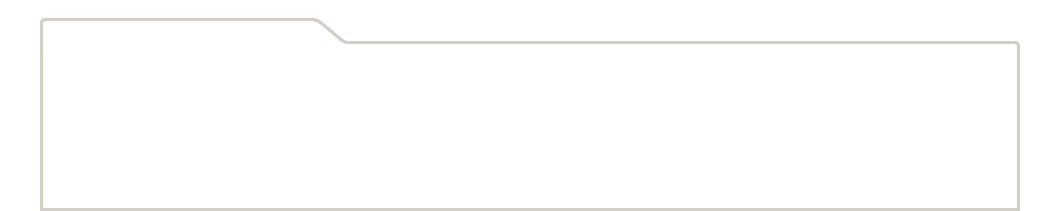
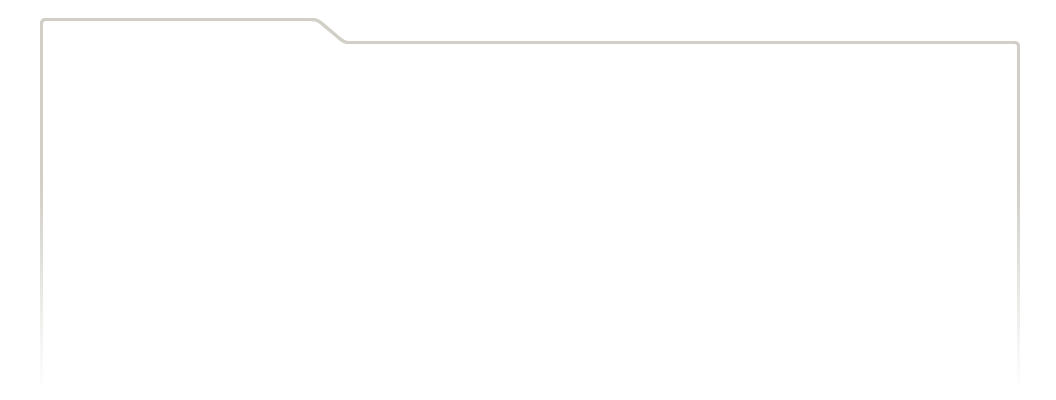
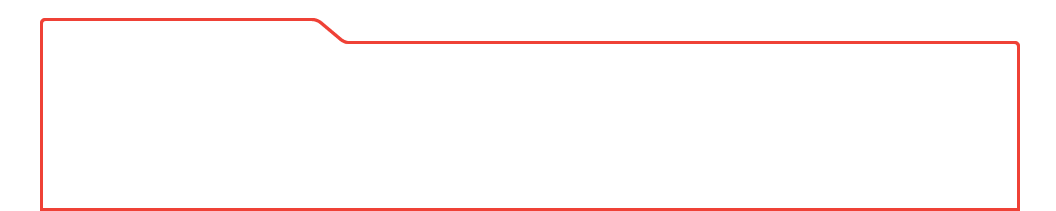
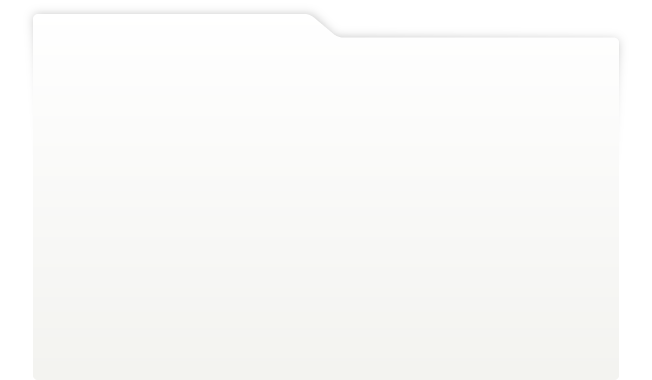
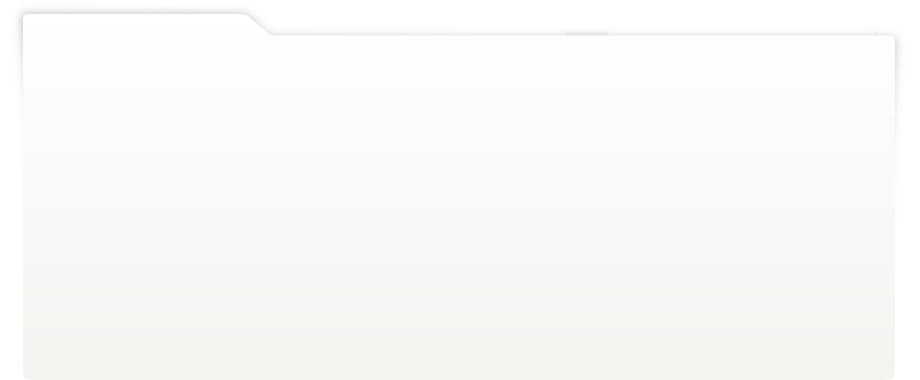
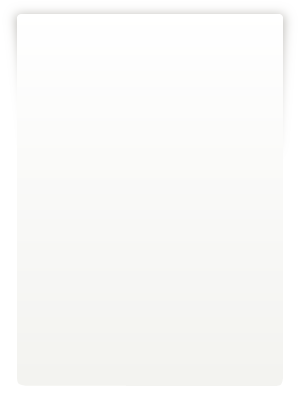
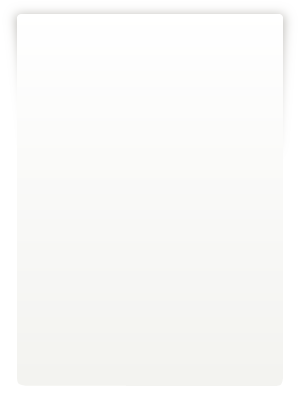
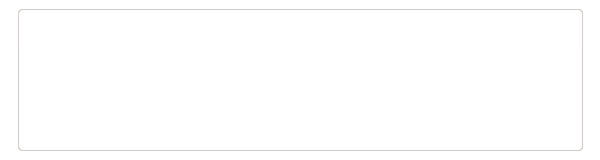
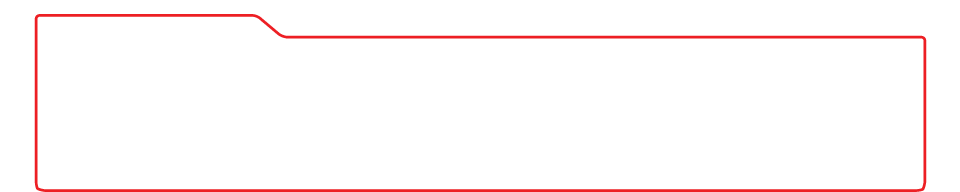
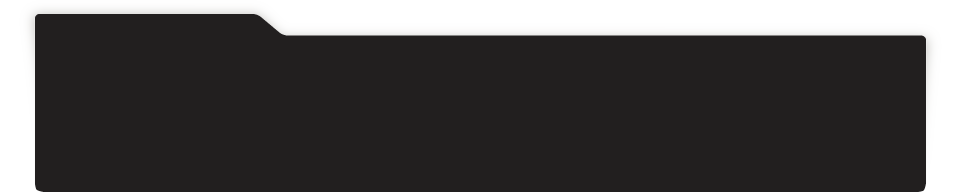
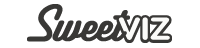
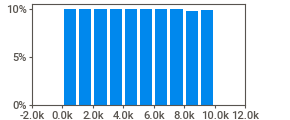
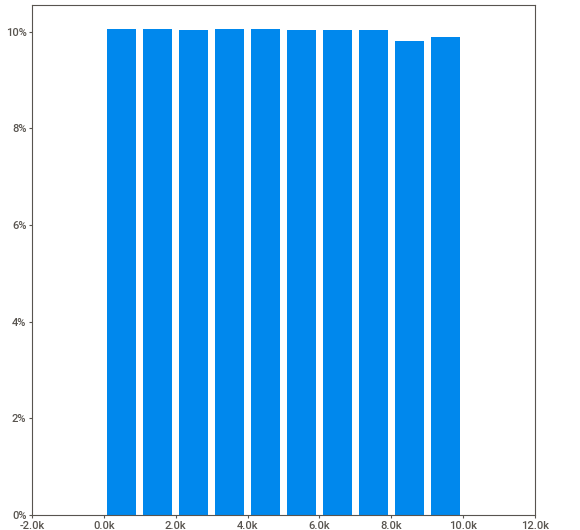
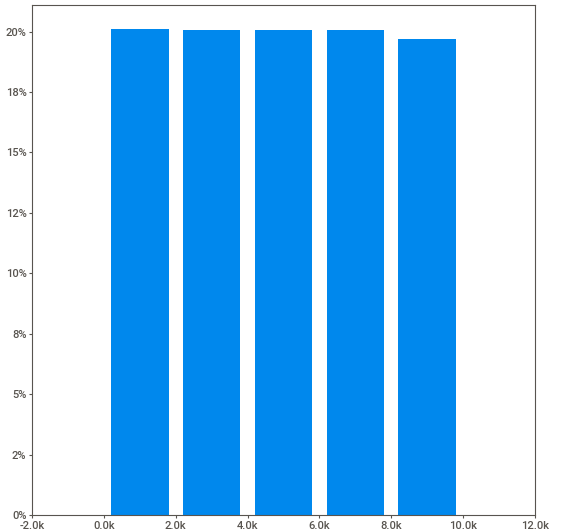
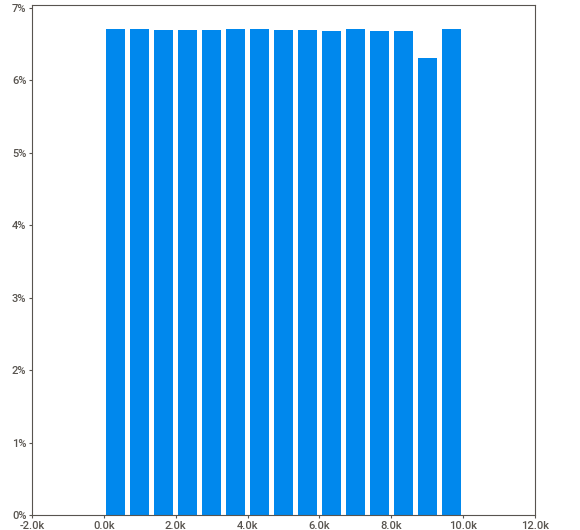
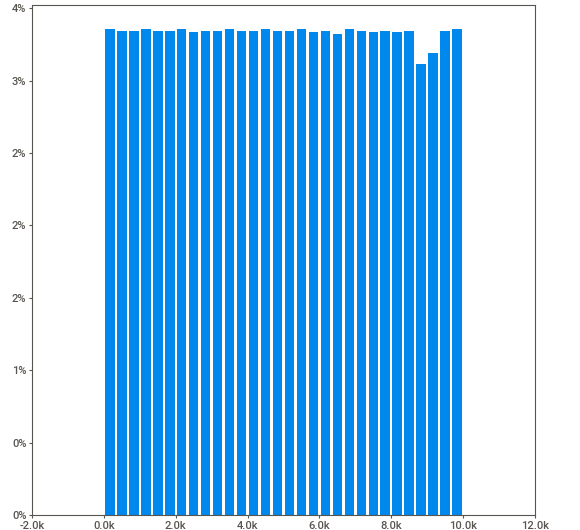
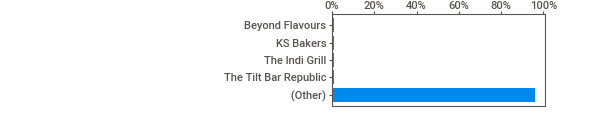
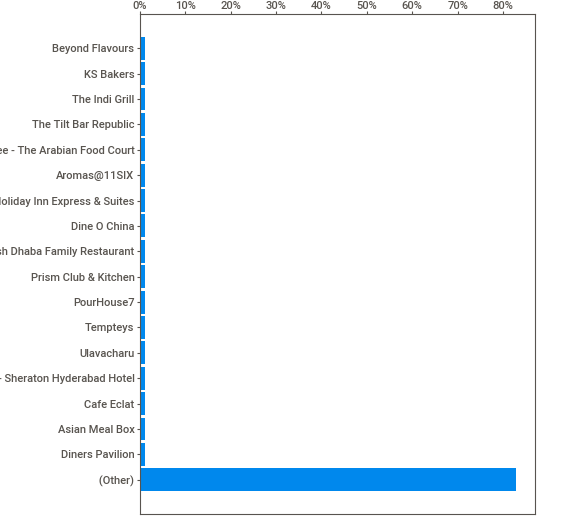
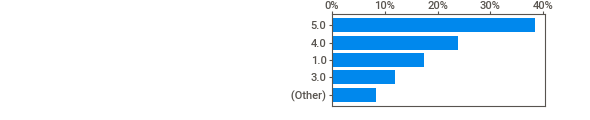
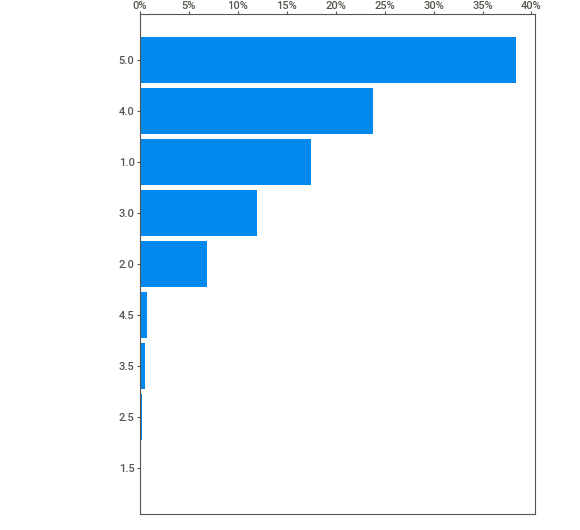
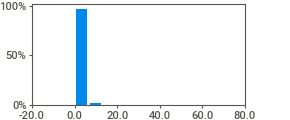
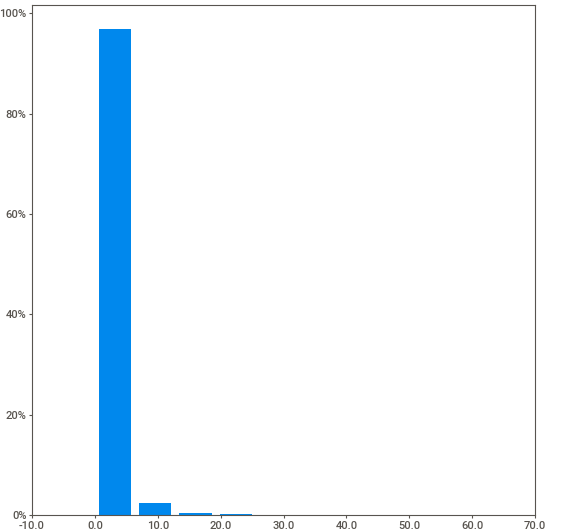
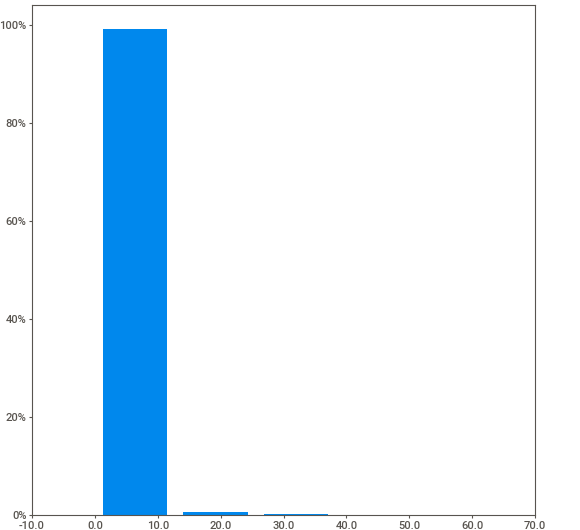
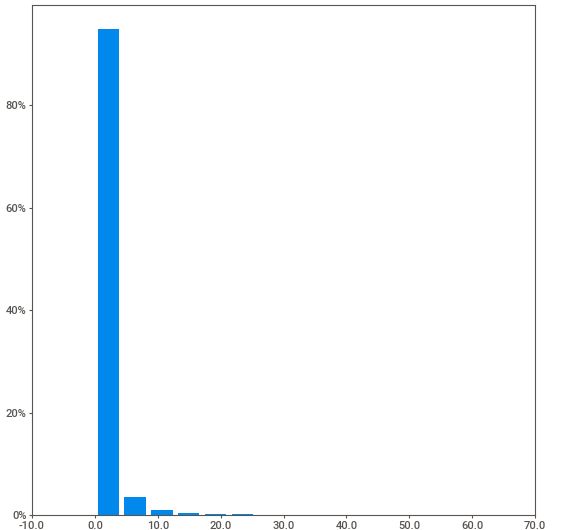
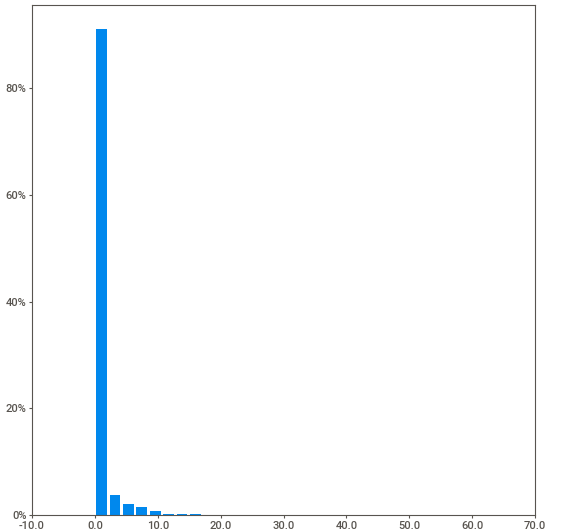
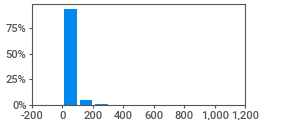
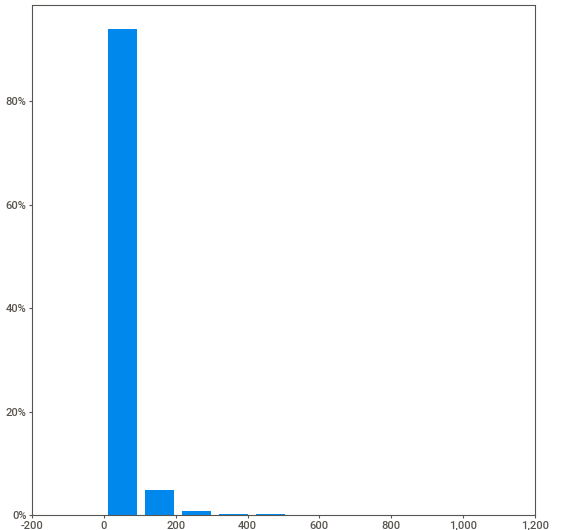
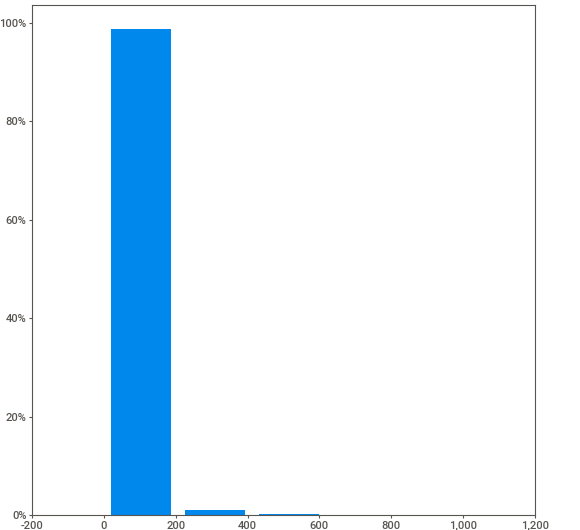
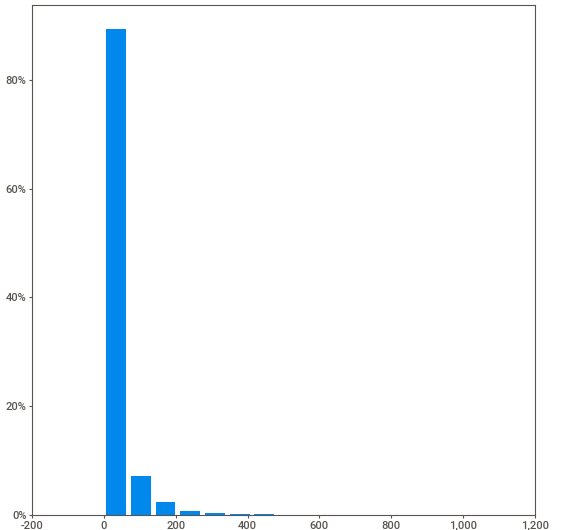
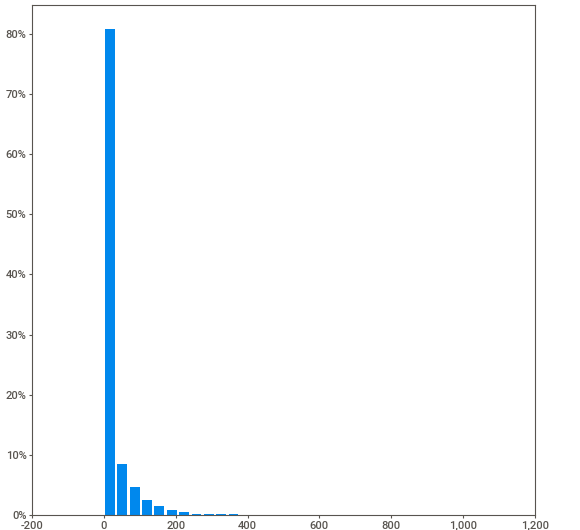
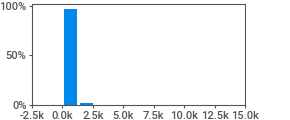
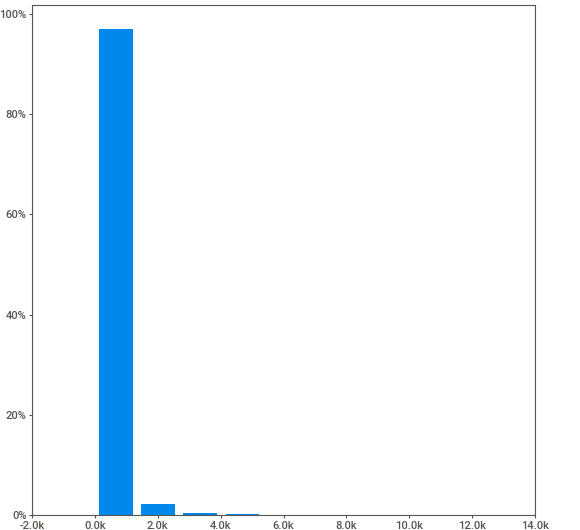
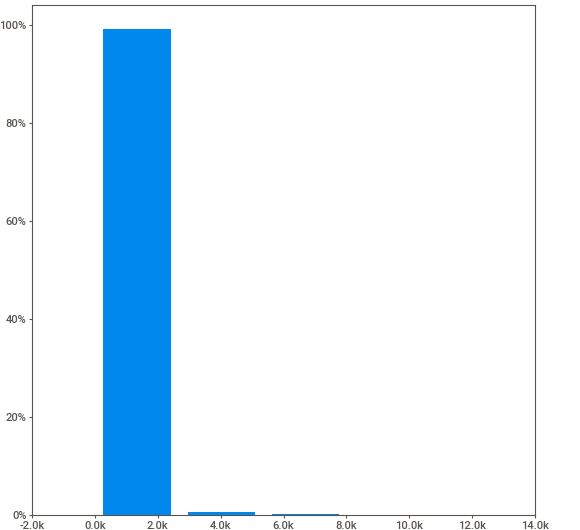
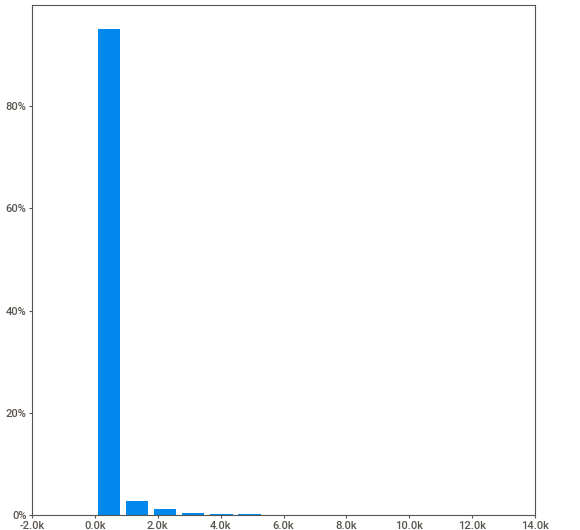
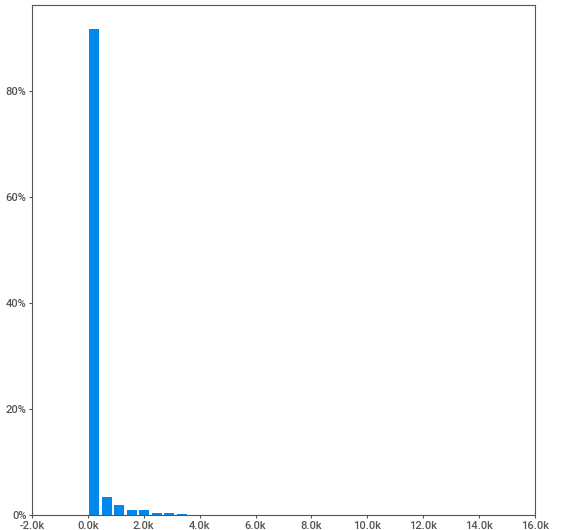
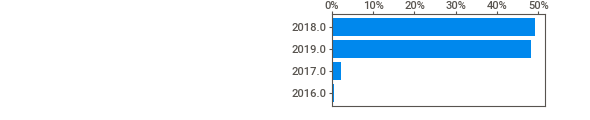
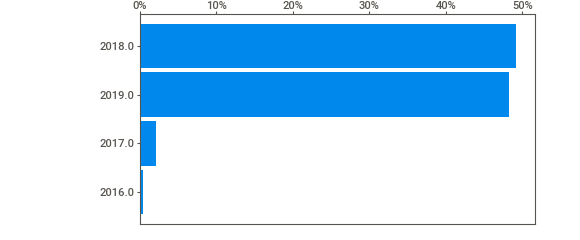
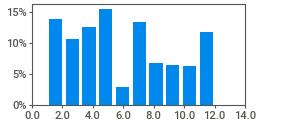
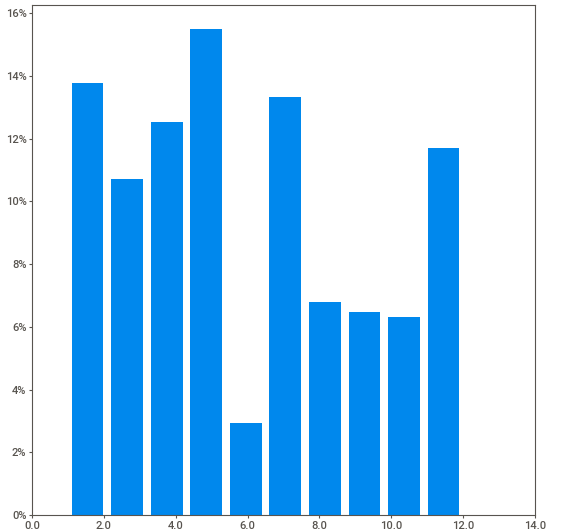
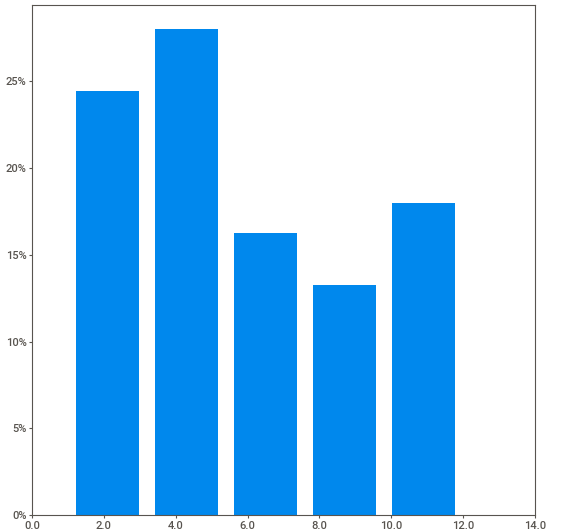
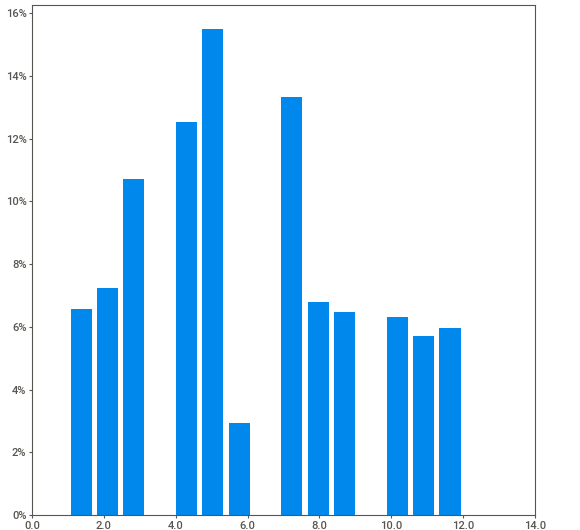
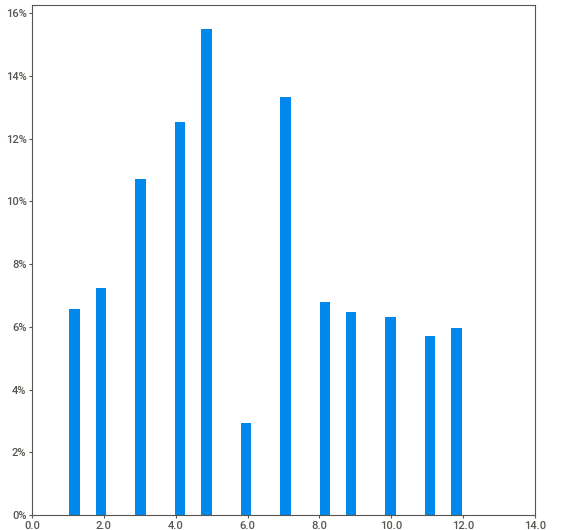
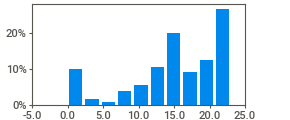
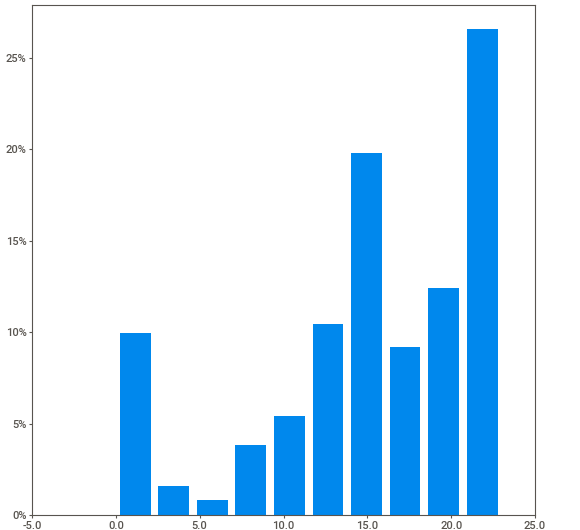
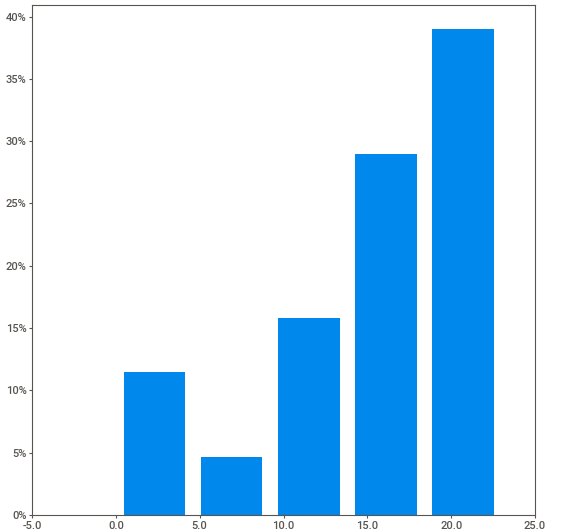
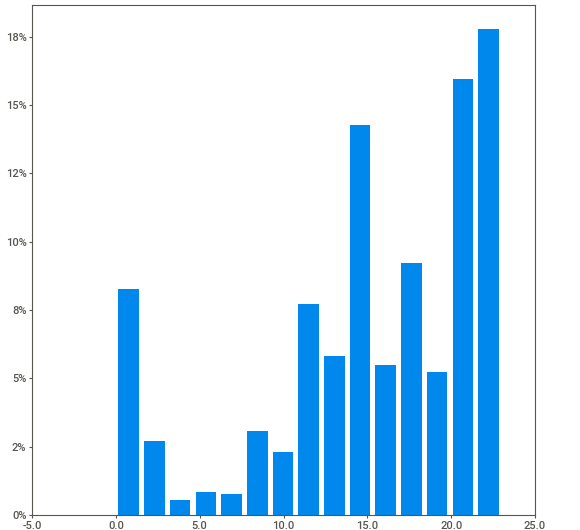
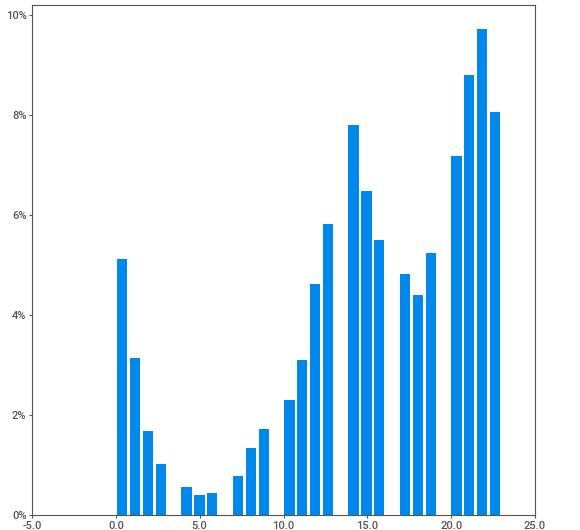
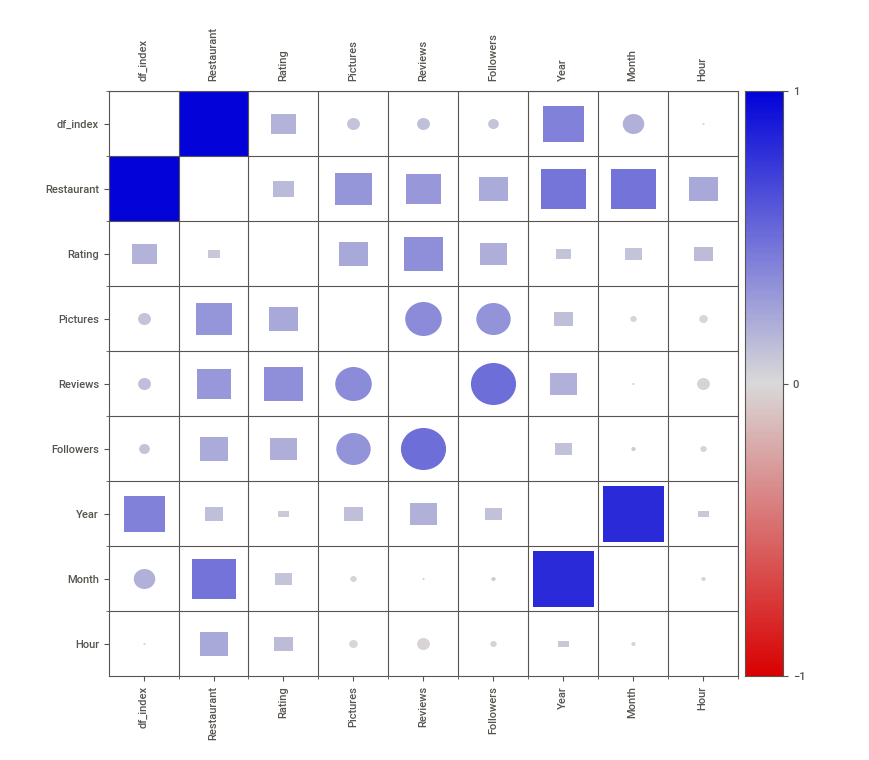
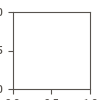

In [75]:
# Chart - 1 visualization code
import sweetviz as sv
detailedreport = sv.analyze(df_reviews)
detailedreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)

In [76]:
# to find out the top reviewrs, we  will first create a list of all the reviewers
reviewer_list = df_reviews.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


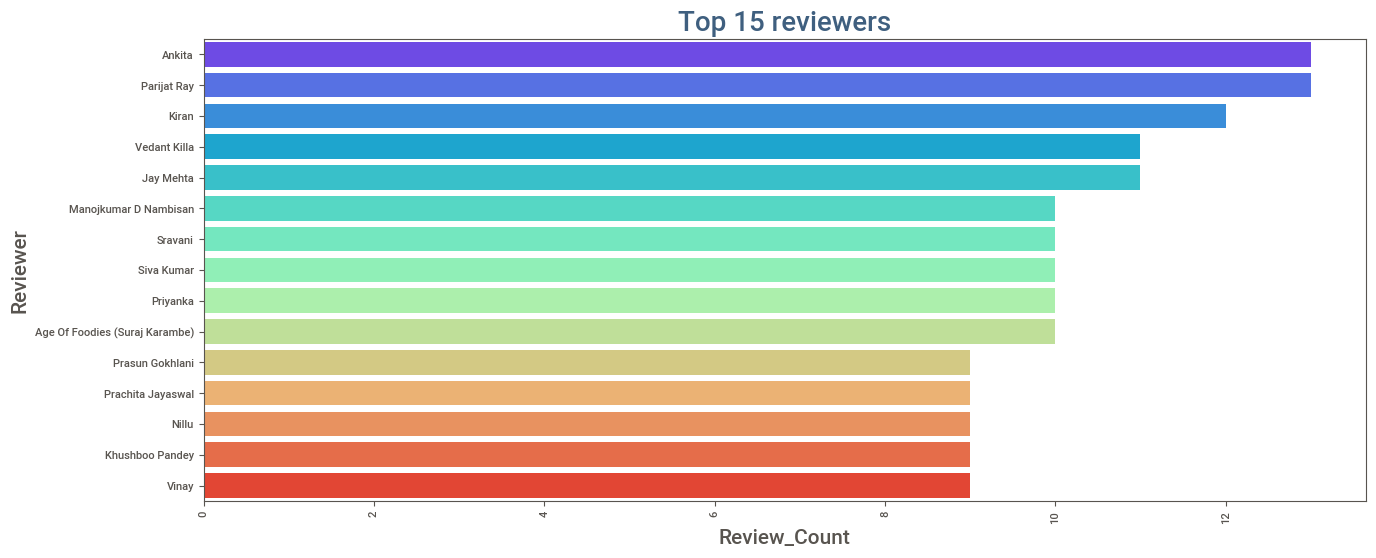

In [77]:
# Chart - 2 visualization code
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()



In [78]:
# Average of the ratings of reviewers with review count
review_ratings=df_reviews.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

,Reviewer,Review_Count,AverageRatings
2,Kiran,12,4.500000
11,Prachita Jayaswal,9,4.333333
3,Vedant Killa,11,4.000000
6,Sravani,10,4.000000
10,Prasun Gokhlani,9,4.000000


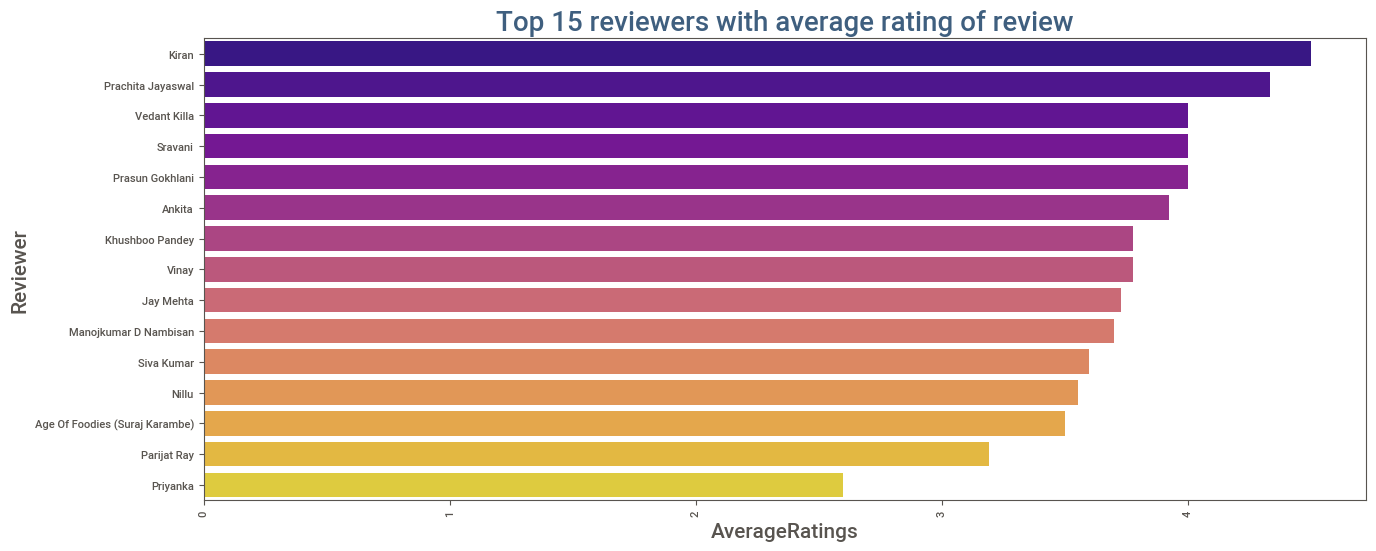

In [79]:
# Chart - 3 visualization code
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

In [80]:
# Review per hour
reviews_hour = df_reviews.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

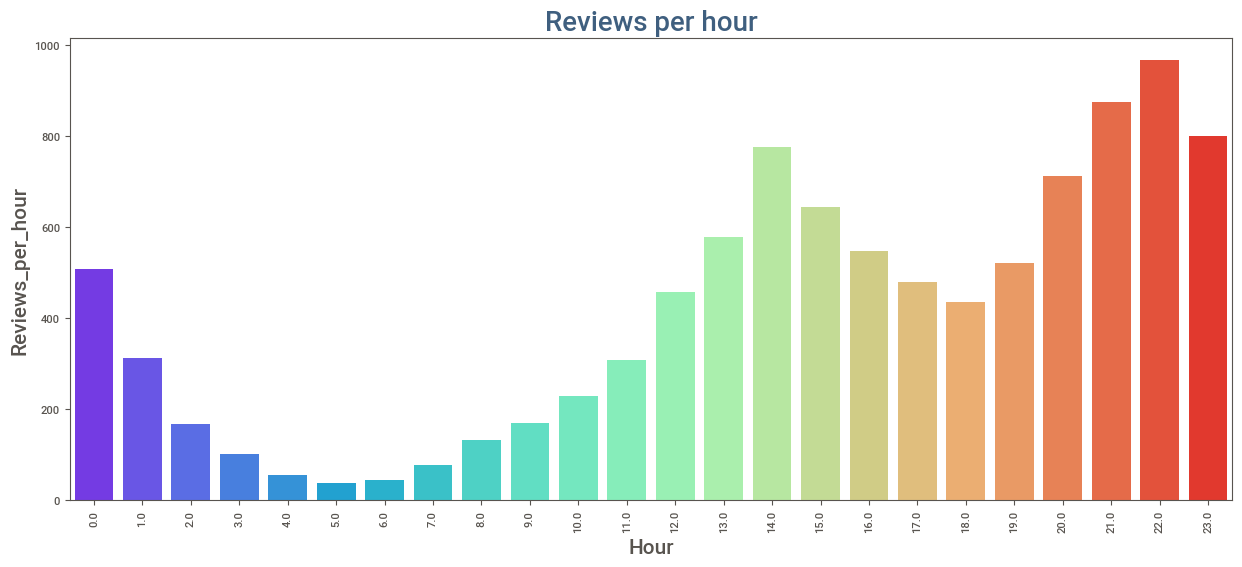

In [81]:
# Chart - 4 visualization code
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

In [85]:
from google.colab import files


uploaded = files.upload()


Saving Zomatodata.csv to Zomatodata (1).csv


In [87]:
df_onee=pd.read_csv("Zomatodata.csv")

In [88]:
df_onee['Cuisines'] = df_onee['Cuisines'].apply(lambda x : x.lower())

In [89]:
cuisine_df=df_onee.loc[:,['Name','Cost','Cuisines']]

In [90]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south indian, north indian"
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, beverages"
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, mediterranean"


In [91]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

In [92]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [ ]:
##Let us create one hot encoded labels for each type of cuisines and dropping the cuisine column

In [93]:
from sklearn.preprocessing import MultiLabelBinarizer

In [94]:
mlb = MultiLabelBinarizer(sparse_output=True)

In [95]:
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [96]:
# Remove nan rating in Rating column
df_reviews.dropna(subset=['Rating'],inplace=True)

In [97]:
df_reviews['Rating'] = df_reviews['Rating'].replace('Like', '4')

In [98]:
# Change data type of rating column to float
df_reviews['Rating']= df_reviews['Rating'].astype('float')

In [99]:
df_reviews.dropna(subset =['Review'], inplace=True)

In [100]:
ratings_df  = df_reviews.groupby('Restaurant')['Rating'].mean().reset_index()

In [101]:
ratings_df .sort_values(by='Rating',ascending = False).head(15)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [102]:
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [103]:
df_cluster.head(3)

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66


In [104]:
##Changing names and orders of columns

df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

In [105]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       100 non-null    Sparse[int64, 0]
 4   andhra         100 non-null    Sparse[int64, 0]
 5   arabian        100 non-null    Sparse[int64, 0]
 6   asian          100 non-null    Sparse[int64, 0]
 7   bbq            100 non-null    Sparse[int64, 0]
 8   bakery         100 non-null    Sparse[int64, 0]
 9   beverages      100 non-null    Sparse[int64, 0]
 10  biryani        100 non-null    Sparse[int64, 0]
 11  burger         100 non-null    Sparse[int64, 0]
 12  cafe           100 non-null    Sparse[int64, 0]
 13  chinese        100 non-null    Sparse[int64, 0]
 14  continental    100 non-null    Sparse[int64

In [106]:
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')


In [107]:
df_cluster['Cost']= df_cluster['Cost'].astype('float')

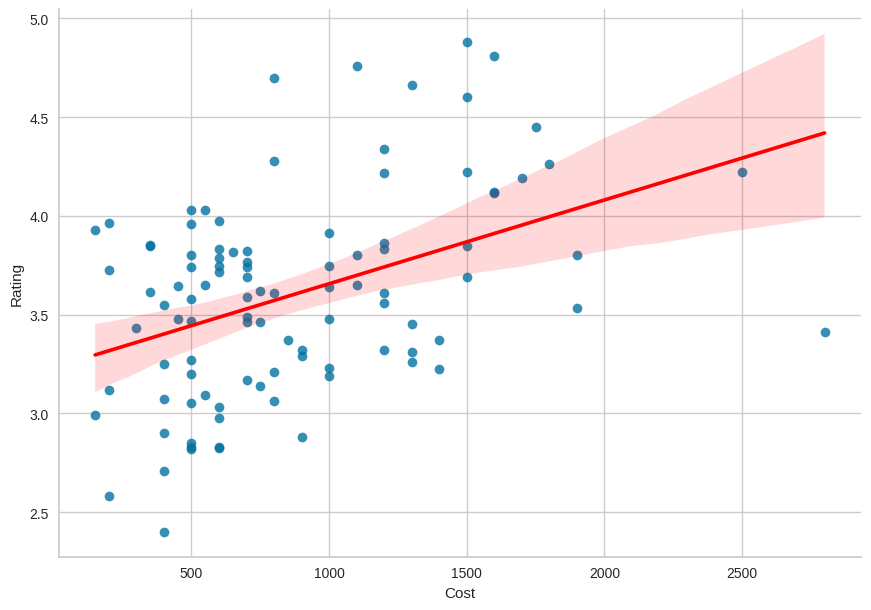

In [108]:
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

In [ ]:
#K-Means Clustering

In [82]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [109]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis =1)).inertia_
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

TypeError: ignored

<Figure size 1300x700 with 0 Axes>

In [110]:
# let us take 5 as initial cluster number
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [111]:
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))

In [112]:
df_cluster['labels'] = cluster_lbl

Text(0.5, 0, 'Cost')

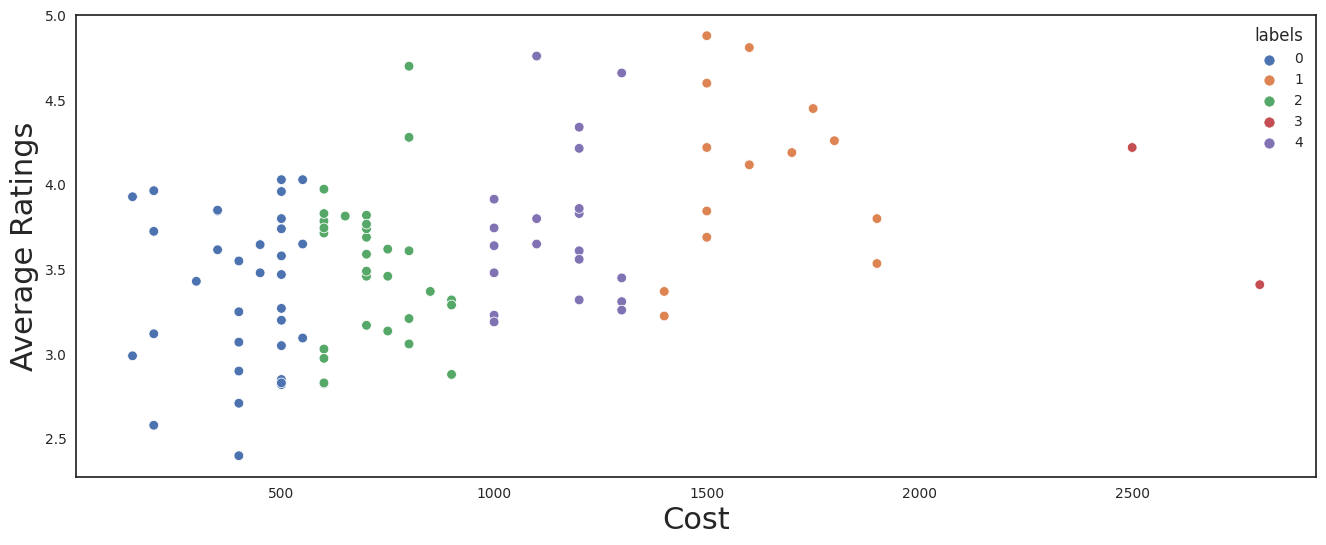

In [113]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

In [114]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [115]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [116]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian    16
chinese         9
fastfood        8
dtype: int64 

Top cuisines in cluster 1
 northindian    11
continental     6
asian           5
dtype: int64 

Top cuisines in cluster 2
 northindian    18
chinese        18
biryani        11
dtype: int64 

Top cuisines in cluster 3
 asian          2
italian        2
continental    2
dtype: int64 

Top cuisines in cluster 4
 northindian    14
chinese         9
italian         7
dtype: int64 



In [ ]:
#PCA

In [117]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [119]:
X_pca = pca.fit_transform(X)

In [120]:
pca.components_

array([[-9.62465184e-02,  9.57677203e-03,  5.92680890e-02,
        -8.10689184e-02,  3.22812540e-03, -2.36603488e-02,
         1.13211710e-02,  1.00058721e-01,  6.13264813e-02,
        -1.81108063e-01,  9.94861590e-02,  1.45240528e-01,
        -5.39620575e-01, -1.45098514e-01,  2.97973008e-01,
        -2.13659614e-02,  2.61045926e-01, -2.35456513e-02,
        -4.90616615e-03, -3.85997936e-03, -2.72274416e-02,
         4.55328901e-02, -6.60734334e-05, -1.28450123e-01,
        -1.69161056e-02, -1.37358749e-02, -6.42034081e-02,
         1.54018096e-02, -0.00000000e+00, -2.38269280e-02,
        -1.88773107e-02, -0.00000000e+00,  1.71550564e-02,
         3.05312331e-02, -2.98963405e-02,  1.59082163e-02,
        -5.94759828e-01,  2.12156286e-02, -1.72169962e-02,
        -4.20780032e-02, -1.00232235e-01,  3.60174653e-03,
         2.38269176e-02, -6.54165803e-03, -1.92912307e-03,
         2.33622022e-02, -1.92739252e-01],
       [ 2.32279349e-01,  1.68080983e-01, -3.87599307e-03,
        -1.22

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

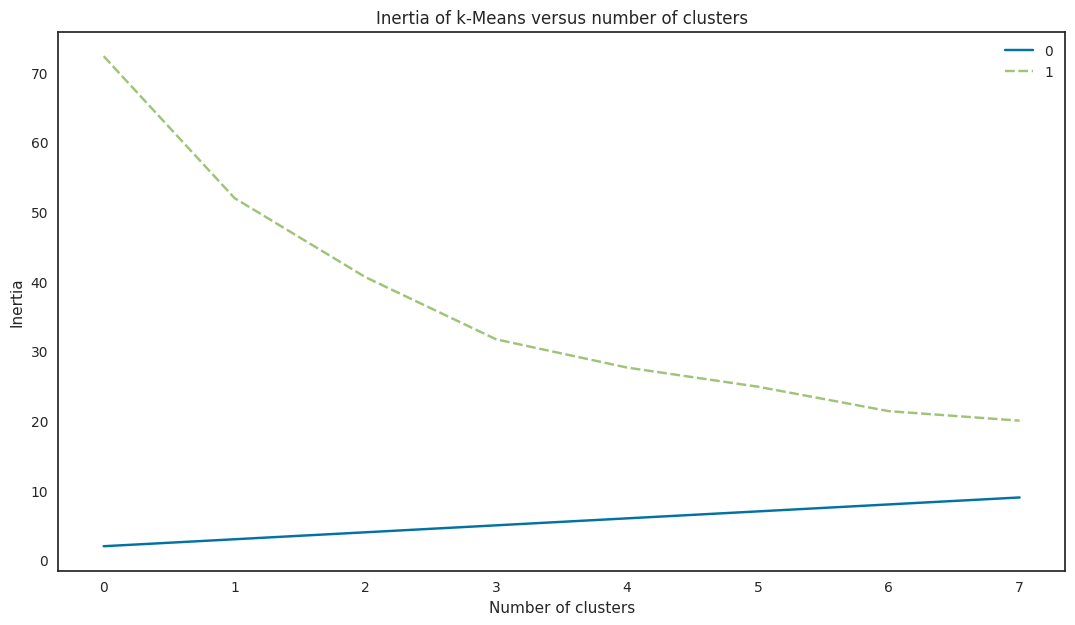

In [133]:
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(data = (range(2, 10), scores1))
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [122]:
model1 = KMeans(random_state=11, n_clusters=5)
model1.fit(X_pca)

KMeans(n_clusters=5, random_state=11)

In [123]:
cluster_labels = model1.predict(X_pca)

In [134]:
# Making label column
df_cluster['labels'] = cluster_labels

Text(0.5, 0, 'PC1')

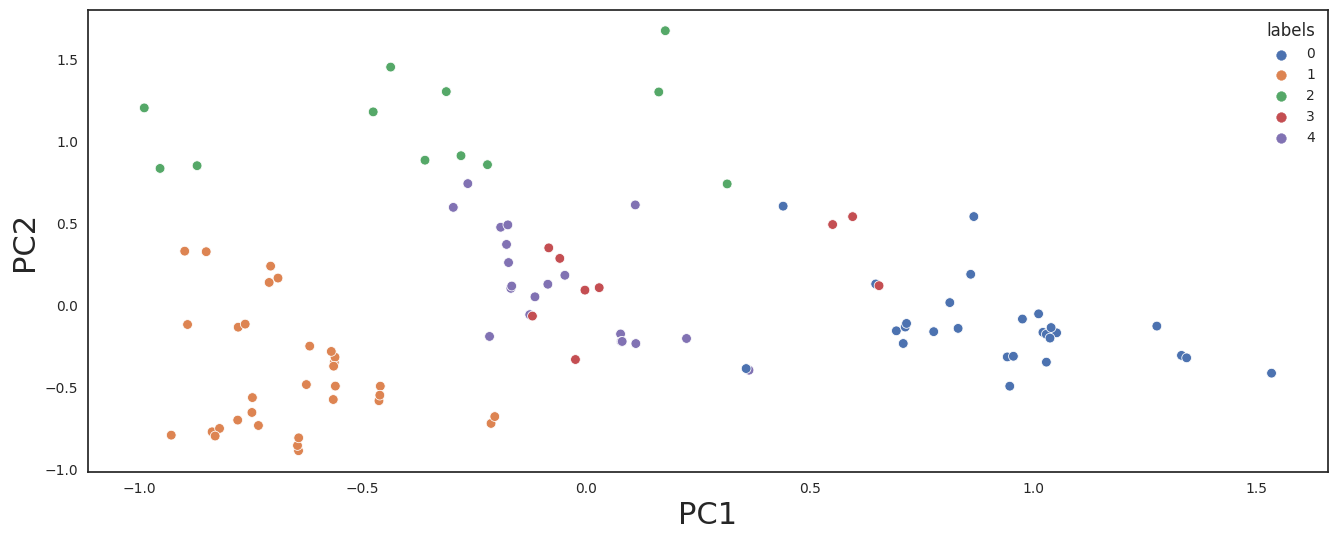

In [135]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [136]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [138]:
list_of_df = [df_0,df_1,df_2,df_3,df_4]

In [139]:
# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Top Cuisines in Cluster 0 
 desserts    12
fastfood    10
cafe         6
dtype: int64 

Top Cuisines in Cluster 1 
 northindian    32
chinese        31
biryani        13
dtype: int64 

Top Cuisines in Cluster 2 
 continental    12
italian         9
northindian     8
dtype: int64 

Top Cuisines in Cluster 3 
 asian      6
chinese    6
thai       2
dtype: int64 

Top Cuisines in Cluster 4 
 northindian      20
mediterranean     4
southindian       4
dtype: int64 

